In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('exchange-rate-twi.csv')
data.head()

,Month,Exchange Rate TWI
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2


In [3]:
data = data.set_index('Month')
data.head()

,Exchange Rate TWI
Month,
1,100.0
2,99.6
3,99.4
4,99.1
5,99.2


In [4]:
data.shape

(304, 1)

<Figure size 1440x288 with 0 Axes>

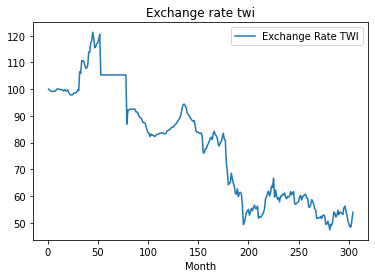

In [5]:
plt.figure(figsize=(20,4))
data.plot()
plt.legend(loc='best')
plt.title('Exchange rate twi')
plt.show()

there are no missing values in the data and so no need for imputatuion.

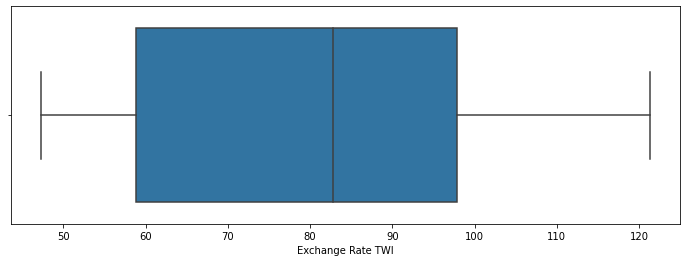

In [6]:
# checking for outliers
import seaborn as sns
plt.figure(figsize=(12,4))
sns.boxplot(x='Exchange Rate TWI', data=data, whis=1)
plt.show()


there are no outliers in the data so we can proceed with the model building

In [7]:
# test train split
train_len = 212
train = data[0:train_len]
test=data[train_len:]

In [8]:
# simple average method
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Exchange Rate TWI'].mean()

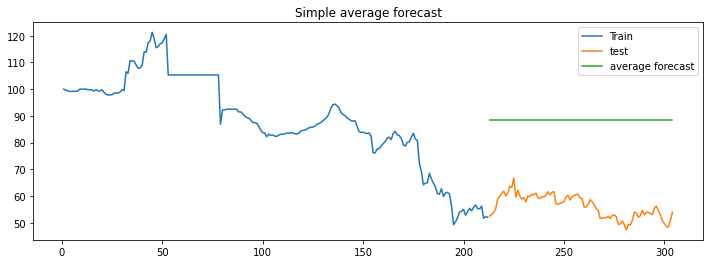

In [9]:
# plotting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate TWI'], label='Train')
plt.plot(test['Exchange Rate TWI'], label='test')
plt.plot(y_hat_avg['avg_forecast'], label='average forecast')
plt.legend(loc='best')
plt.title('Simple average forecast')
plt.show()

In [10]:
y_hat_avg.head()

,Exchange Rate TWI,avg_forecast
Month,,
213,52.5,88.325472
214,53.1,88.325472
215,53.8,88.325472
216,55.2,88.325472
217,58.9,88.325472


In [11]:
# naive method:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Exchange Rate TWI'][train_len-1]

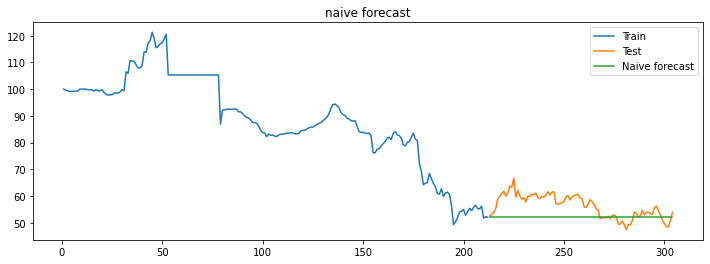

In [12]:
# plotting train, test and forecast
plt.figure(figsize=(12, 4))
plt.plot(train['Exchange Rate TWI'], label='Train')
plt.plot(test['Exchange Rate TWI'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('naive forecast')
plt.show()


In [13]:
y_hat_naive.head()

,Exchange Rate TWI,naive_forecast
Month,,
213,52.5,52.3
214,53.1,52.3
215,53.8,52.3
216,55.2,52.3
217,58.9,52.3


In [14]:
# RSME and MAPE errors on simple average
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_avg['avg_forecast'])/test['Exchange Rate TWI'])*100,2)

In [15]:
results = pd.DataFrame({'Method': ['simple average Method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'MAPE', 'RMSE']]
results


,Method,MAPE,RMSE
0,simple average Method,58.12,32.42


In [16]:
# RSME and MAPE errors on naive method
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_naive['naive_forecast'])/test['Exchange Rate TWI'])*100,2)

In [17]:
mape

8.11

In [18]:
accuracy = 100-mape
accuracy

91.89

### Simple Moving Average Method

In [19]:
y_hat_sma_12 = data.copy()
ma_window = 12
y_hat_sma_12['sma_forecast'] = data['Exchange Rate TWI'].rolling(ma_window).mean()
y_hat_sma_12['sma_forecast'][train_len:] = y_hat_sma_12['sma_forecast'][train_len-1]

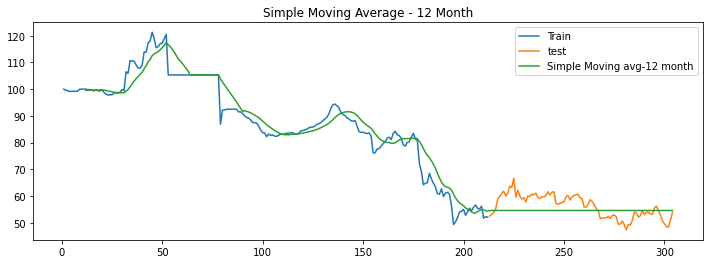

In [20]:
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate TWI'], label='Train')
plt.plot(test['Exchange Rate TWI'], label='test')
plt.plot(y_hat_sma_12['sma_forecast'], label = 'Simple Moving avg-12 month')
plt.legend(loc='best')
plt.title('Simple Moving Average - 12 Month')
plt.show()

In [21]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_sma_12['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_sma_12['sma_forecast'][train_len:])/test['Exchange Rate TWI'])*100,2)
tempresults = pd.DataFrame({'Method': ['Simple Moving avg - 12 month'], 'MAPE': [mape], 'RMSE':[rmse]})
results = pd.concat([results, tempresults])
results

,Method,MAPE,RMSE
0,simple average Method,58.12,32.42
0,Simple Moving avg - 12 month,6.89,4.57


In [22]:
y_hat_sma_3 = data.copy()
ma_window = 3
y_hat_sma_3['sma_forecast'] = data['Exchange Rate TWI'].rolling(ma_window).mean()
y_hat_sma_3['sma_forecast'][train_len:] = y_hat_sma_3['sma_forecast'][train_len-1]


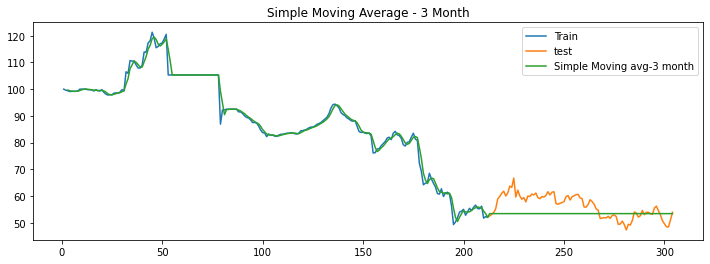

In [23]:
plt.figure(figsize=(12, 4))
plt.plot(train['Exchange Rate TWI'], label='Train')
plt.plot(test['Exchange Rate TWI'], label='test')
plt.plot(y_hat_sma_3['sma_forecast'], label='Simple Moving avg-3 month')
plt.legend(loc='best')
plt.title('Simple Moving Average - 3 Month')
plt.show()

In [24]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_sma_3['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_sma_3['sma_forecast'][train_len:])/test['Exchange Rate TWI'])*100, 2)
tempresults = pd.DataFrame({'Method': ['Simple Moving avg - 3 month'], 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results, tempresults])
results


,Method,MAPE,RMSE
0,simple average Method,58.12,32.42
0,Simple Moving avg - 12 month,6.89,4.57
0,Simple Moving avg - 3 month,7.32,5.10


### ADF test

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
adf_test = adfuller(data['Exchange Rate TWI'])

print("ADF statistic: %f" % adf_test[0])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF statistic: -0.805468
Critical value @ 0.05: -2.87
p-value: 0.817511


### KPSS Test

In [27]:
from statsmodels.tsa.stattools import kpss

In [29]:
kpss_test = kpss(data['Exchange Rate TWI'])

print('KPSS statistic %f' % kpss_test[0])
print('Critical value @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS statistic 2.614489
Critical value @ 0.05: 0.46
p-value: 0.010000
